In [64]:
import cv2 as cv
from PIL import ImageGrab
from dataclasses import dataclass
import numpy as np
from matplotlib import pyplot as plt
import math
import pyautogui
from pynput import keyboard

In [65]:
@dataclass
class Coordinate:
    x: int
    y: int

    def __add__(self, other):
        return Coordinate(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Coordinate(self.x - other.x, self.y - other.y)

    def asTuple(self):
        return (self.x, self.y)

In [66]:
def compute_line_angle(p1: Coordinate, p2: Coordinate):
    dx = p2.x - p1.x
    dy = p2.y - p1.y
    print(f"dx={dx}")
    print(f"dy={dy}")
    angle = np.arctan2(dy, dx) * 180 / math.pi
    return angle

In [67]:
positions = []

# Callback function to handle key press events
def on_press(key):
    print(key)
    global positions
    
    # Stop the listener if the Escape key is pressed
    if key == keyboard.Key.esc:
        return False

    x, y = pyautogui.position()
    positions.append(Coordinate(x,y))

# Callback function to handle key release events
def on_release(key):
    return
    

In [68]:
positions = []

listener = keyboard.Listener(on_press=on_press, on_release=on_release)
listener.start()

# Keep the program running until the listener is stopped
listener.join()

print(positions)

'c'
'c'
Key.esc
[Coordinate(x=547, y=333), Coordinate(x=547, y=415)]


In [69]:
pt1, pt2 = positions
angle = compute_line_angle(pt1, pt2)
dist = math.sqrt((pt2.x - pt1.x)**2 + (pt2.y - pt1.y)**2)
print(f"angle={angle}, dist={dist}")

dx=0
dy=82
angle=90.0, dist=82.0


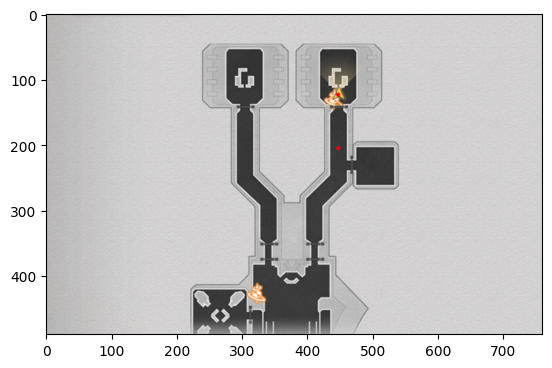

In [74]:
# navigate to map
MAP_TOP_LEFT_X = 100
MAP_TOP_LEFT_Y = 210
MAP_TOP_LEFT = Coordinate(100, 210)
map = ImageGrab.grab((MAP_TOP_LEFT_X,MAP_TOP_LEFT_Y,860,700))
map_cv = cv.cvtColor(np.array(map), cv.COLOR_RGB2BGR)
for coord in positions:
    cv.circle(map_cv, (coord - MAP_TOP_LEFT).asTuple(), 3, (255, 0, 0), -1)
plt.imshow(map_cv)